### What is the most optimal skill to learn for Data Analysts?



     Methodology



  1.Group skills to determine median salary and likelihood of being in posting

  2.Visualize median salary vs percent skill demand

  3.(Optional) Determine if certain technologies are more prevalent


In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


In [2]:
# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US =df[(df["job_title"] == 'Data Analyst') & (df["job_country"] == "United States")].copy()

In [4]:
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

df_DA_US_exploded = df_DA_US.explode("job_skills")

df_DA_US_exploded[["salary_year_avg", "job_skills"]]

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql
...,...,...
781263,75000.0,sql
781263,75000.0,python
781263,75000.0,scala
781263,75000.0,databricks


In [5]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')["salary_year_avg"].agg(['count', 'median']).sort_values(by="count", ascending=False)

In [6]:
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median':"median_salary"})

In [7]:
df_job_count = len(df_DA_US)

df_DA_skills["skill_percent"] = df_DA_skills["skill_count"] / df_job_count *100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills["skill_percent"] > skill_percent]



In [8]:
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,714,87500.0,63.864043
excel,472,77500.0,42.218247
python,408,90000.0,36.493739
tableau,398,90000.0,35.599284
power bi,279,87500.0,24.955277
r,244,90000.0,21.824687
sas,200,84078.5,17.889088
powerpoint,102,77500.0,9.123435
word,89,75000.0,7.960644


In [15]:
df_technology = df["job_type_skills"].copy()

# Remove duplicates
df_technology = df_technology.drop_duplicates()

# Remove NaN values
df_technology = df_technology.dropna()

# Combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # Convert string to dictionary
    for key, value in row_dict.items(): 
        if key in technology_dict:  # If key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:  # If key does not exists in technology_dict, add key and value
            technology_dict[key] = value

# Remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value)) 

technology_dict                

{'analyst_tools': ['sas',
  'looker',
  'power bi',
  'powerpoint',
  'excel',
  'ssis',
  'powerbi',
  'cognos',
  'msaccess',
  'visio',
  'qlik',
  'sap',
  'splunk',
  'word',
  'ssrs',
  'ms access',
  'outlook',
  'spss',
  'spreadsheet',
  'esquisse',
  'sheets',
  'sharepoint',
  'tableau',
  'nuix',
  'datarobot',
  'microstrategy',
  'dax',
  'alteryx'],
 'programming': ['groovy',
  'apl',
  'sas',
  'java',
  'lua',
  'scala',
  'julia',
  'solidity',
  'rust',
  'html',
  'elixir',
  'sql',
  'golang',
  'javascript',
  'lisp',
  'c',
  'shell',
  'python',
  'ocaml',
  'haskell',
  'c++',
  'assembly',
  'vb.net',
  'swift',
  'vba',
  'no-sql',
  't-sql',
  'ruby',
  'go',
  'r',
  'perl',
  'c#',
  'bash',
  'mongodb',
  'nosql',
  'matlab',
  'php',
  'css',
  'cobol',
  'visualbasic',
  'pascal',
  'visual basic',
  'mongo',
  'f#',
  'objective-c',
  'sass',
  'clojure',
  'delphi',
  'dart',
  'erlang',
  'fortran',
  'typescript',
  'powershell',
  'kotlin',
  'crys

In [23]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=["technology", 'skills'])


In [24]:
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,sas
0,analyst_tools,looker
0,analyst_tools,power bi
0,analyst_tools,powerpoint
0,analyst_tools,excel
...,...,...
9,sync,microsoft teams
9,sync,mattermost
9,sync,slack
9,sync,rocketchat


In [29]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

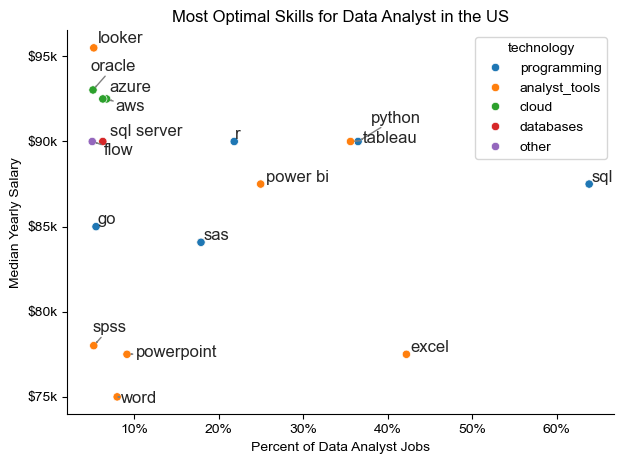

In [32]:
from adjustText import adjust_text

# df_plot.plot(kind="scatter", x='skill_percent', y="median_salary")

sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i], df_DA_skills_high_demand["median_salary"].iloc[i], txt ))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->',color="gray"))

# set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust Layout and display plot
plt.tight_layout()
plt.show()